<a href="https://colab.research.google.com/github/geojaimo/relevel/blob/main/Credit_amount_EDA_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print('Earlier, figure default size was: ',plt.rcParams['figure.figsize'])
plt.rcParams['figure.figsize']=(10,5)
print('Now, figure default size was: ',plt.rcParams['figure.figsize'])


Earlier, figure default size was:  [6.0, 4.0]
Now, figure default size was:  [10.0, 5.0]


In [4]:
plt.style.use('ggplot')

In [5]:
credit_data=pd.read_csv('/content/drive/MyDrive/application_data.csv')
credit_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Shape of the data
credit_data.shape

(307511, 122)

In [7]:
# To check for duplicates
credit_data['SK_ID_CURR'].nunique()-len(credit_data['SK_ID_CURR'])

0

In [8]:
credit_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
null_percent=(credit_data.isnull().sum()/307511)*100

In [10]:
null_percent.sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [11]:
null_col=null_percent[null_percent.values>45]
null_col

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

Text(0.5, 1.0, 'Columns with null greater than 45%')

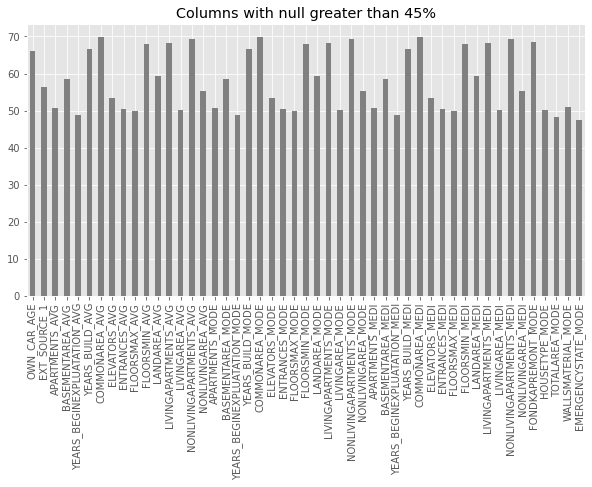

In [12]:
null_col.plot(kind='bar',color='grey')
plt.title('Columns with null greater than 45%')


In [13]:
def remove_null_cols(data):
  perc=0.45
  df=data.copy()
  shape_before=df.shape
  remove_cols=(df.isnull().sum()/len(df))
  remove_cols=list(remove_cols[remove_cols.values>=perc].index)
  df.drop(labels=remove_cols,axis=1,inplace=True)
  print('Number of columns dropped\t:',len(remove_cols))
  print('\nOld dataset rows,columns',shape_before,'\n New dataset rows,columns',df.shape)
  return df

In [14]:
credit_data_1=remove_null_cols(credit_data)

Number of columns dropped	: 49

Old dataset rows,columns (307511, 122) 
 New dataset rows,columns (307511, 73)


In [15]:
null_perc_1=(credit_data_1.isnull().sum()/len(credit_data_1))*100
null_perc_1.sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

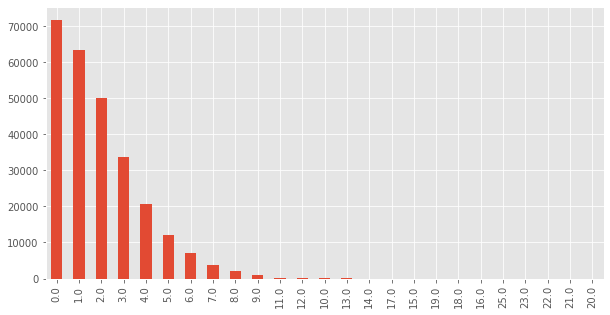

In [16]:
credit_data_1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts().plot(kind='bar')

In [17]:
# find mode of the columns
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_MON.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_WEEK.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_DAY.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_QRT.mode())

0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64


In [18]:
credit_data_2=credit_data_1.copy()

In [19]:
# impute null with 0 as found in mode

impute_list=['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']

for i in impute_list:
  credit_data_2[i]=credit_data_1[i].fillna(0)

In [20]:
# checking whether null are removed and filled with 0
print(credit_data_2.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum())
print(credit_data_2.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum())
print(credit_data_2.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum())
print(credit_data_2.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum())
print(credit_data_2.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum())
print(credit_data_2.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum())

0
0
0
0
0
0


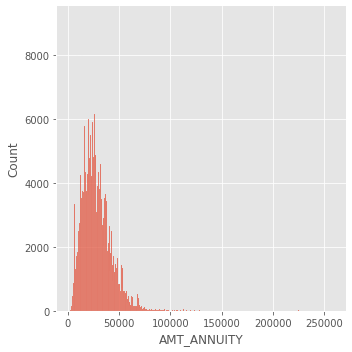

In [21]:
sns.displot(credit_data_2.AMT_ANNUITY)

In [22]:
credit_data_2.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [23]:
credit_data_2.AMT_ANNUITY.median()

24903.0

In [24]:
# imputing nulls with median
credit_data_2['AMT_ANNUITY']=credit_data_1['AMT_ANNUITY'].fillna(credit_data_2.AMT_ANNUITY.median())
credit_data_2['AMT_ANNUITY'].isnull().sum()

0

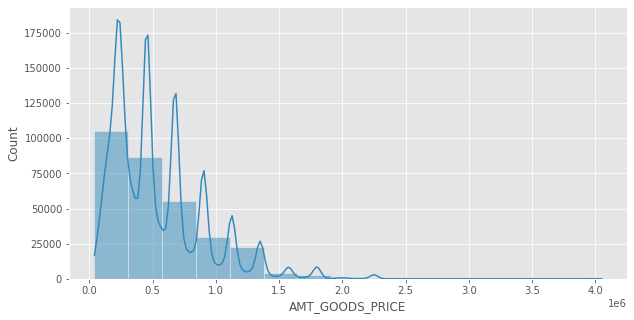

In [25]:
sns.histplot(credit_data_2.AMT_GOODS_PRICE,kde=True,bins=15)

In [26]:
credit_data_1.AMT_GOODS_PRICE.median()

450000.0

In [27]:
credit_data_1.AMT_GOODS_PRICE.mean()

538396.2074288895

In [28]:
credit_data_2['AMT_GOODS_PRICE']=credit_data_1['AMT_ANNUITY'].fillna(credit_data_2.AMT_GOODS_PRICE.median())
credit_data_2['AMT_GOODS_PRICE'].isnull().sum()

0

In [29]:
credit_data_2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [30]:
erroneous_cols=[cols for cols in credit_data_2 if cols.startswith('DAYS')]
erroneous_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [31]:
credit_data_2[erroneous_cols]=abs(credit_data_2[erroneous_cols])

In [32]:
credit_data_2[erroneous_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


In [33]:
credit_data_2.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [34]:
credit_data_2.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [35]:
credit_data_2.loc[credit_data_2.CODE_GENDER=='XNA','CODE_GENDER'] = 'F'
credit_data_2.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [36]:
credit_data_2['ORGANIZATION_TYPE']= credit_data_1['ORGANIZATION_TYPE'].replace('XNA',np.NaN)

In [37]:
credit_data_2['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [38]:
credit_data_2['AMT_INCOME_RANGE']=pd.qcut(credit_data_2.AMT_INCOME_TOTAL,
                                          q=[0,0.2,0.5,0.8,0.95,1],
                                          labels=['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])

In [39]:
credit_data_2['AMT_INCOME_RANGE'].head()

0      MEDIUM
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [40]:
credit_data_2['AMT_CREDIT_RANGE']=pd.qcut(credit_data_2.AMT_CREDIT,
                                          q=[0,0.2,0.5,0.8,0.95,1],
                                          labels=['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])

In [41]:
credit_data_2['AMT_CREDIT_RANGE'].head()

0         LOW
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [42]:
credit_data_2['DAYS_BIRTH']=(credit_data_2['DAYS_BIRTH']/365).astype(int)
credit_data_2['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [43]:
credit_data_2['DAYS_BIRTH_BINS']=pd.cut(credit_data_2['DAYS_BIRTH'],
                                        bins=[19,25,35,60,100],
                                        labels=['Very_Young','Young','Middle_Age','Senior_Citizen'])

In [44]:
credit_data_2['DAYS_BIRTH_BINS'].value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: DAYS_BIRTH_BINS, dtype: int64

In [45]:
defaulter=credit_data_2[credit_data_2.TARGET==1]
non_defaulter=credit_data_2[credit_data_2.TARGET==0]

In [46]:
print('defaulter',defaulter.shape)
print('non_defaulter',non_defaulter.shape)

defaulter (24825, 76)
non_defaulter (282686, 76)


In [47]:
# defaulter_percentage
round(defaulter.shape[0]*100/credit_data_2.shape[0],2)

8.07

In [48]:
# non_defaulter_percentage
round(non_defaulter.shape[0]*100/credit_data_2.shape[0],2)

91.93

Text(0.5, 1.0, 'Loan application by occupation type')

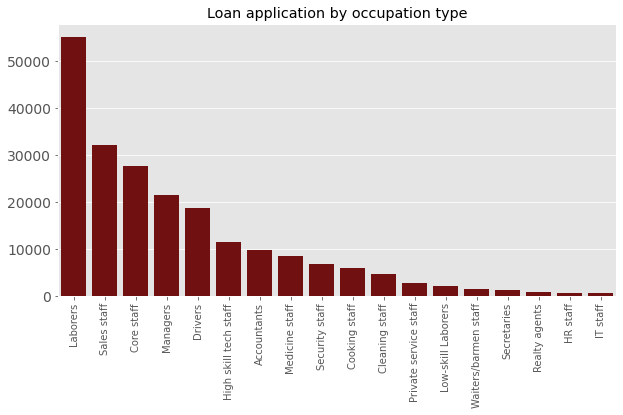

In [49]:
series=credit_data_2['OCCUPATION_TYPE'].value_counts()
sns.barplot(x=series.index,y=series.values,color='maroon')
plt.xticks(rotation=90)
plt.yticks(size=14)
plt.title('Loan application by occupation type')

Text(0.5, 1.0, 'Loan application by organization type')

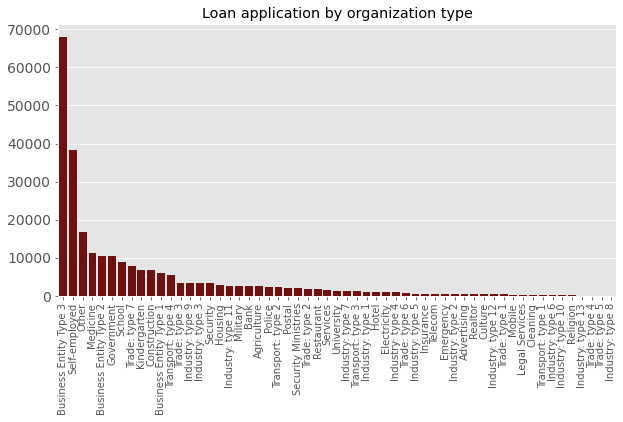

In [50]:
series=credit_data_2['ORGANIZATION_TYPE'].value_counts()
sns.barplot(x=series.index,y=series.values,color='maroon')
plt.xticks(rotation=90)
plt.yticks(size=14)
plt.title('Loan application by organization type')

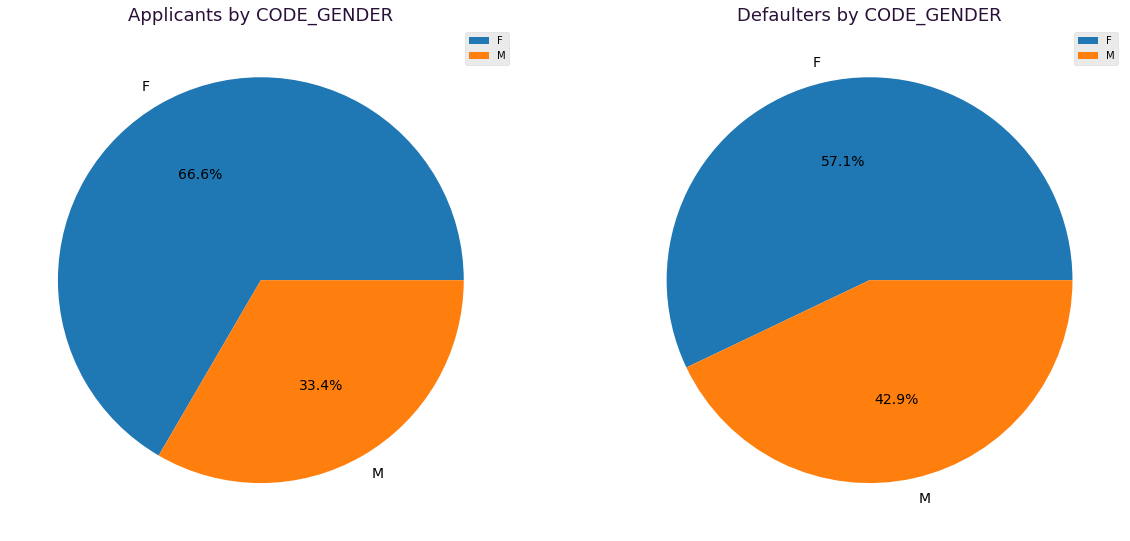

In [51]:
## Code to See the Comparison of Gender Applicants Distribution among Defaulters and Non-Defaulters 

colors = sns.color_palette('tab10')[0:5]                   # Setting Color pallette for pie chart

fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))   # Defining Subplots and figure size. Keeping it wider for 2 chart

data = non_defaulter['CODE_GENDER'].value_counts()         # Data prep fot Subplot 1 ( Non Defaulter )
data_df = pd.DataFrame({'labels': data.index,'values': data.values})     

# Pie chart for Subplot 1 ( Non Defaulter part )
axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
axes[0].set_title('Applicants by CODE_GENDER', size=18,color = '#291038')
axes[0].legend()

# Pie chart for Subplot 2 ( Defaulter part )
axes[1].set_title("Box Plot of  " )
data = defaulter['CODE_GENDER'].value_counts()
data_df = pd.DataFrame({'labels': data.index,'values': data.values})
axes[1].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
axes[1].set_title('Defaulters by CODE_GENDER', size=18,color = '#291038')
axes[1].legend()
   

In [52]:
# Function for Univariate Comarison

def univariate_comparison(col,hue=None):
    colors = sns.color_palette('tab10')[0:8]

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))
    
    data = non_defaulter[col].value_counts()
    data_df = pd.DataFrame({'labels': data.index,'values': data.values})
    axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
    axes[0].set_title('Applicants by  '+col, size=18,color = '#291038')
    axes[0].legend()

    
    data = defaulter[col].value_counts()
    data_df = pd.DataFrame({'labels': data.index,'values': data.values})
    axes[1].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
    axes[1].set_title('Defaulters by  '+col, size=18,color = '#291038')
    axes[1].legend()

    plt.tight_layout()



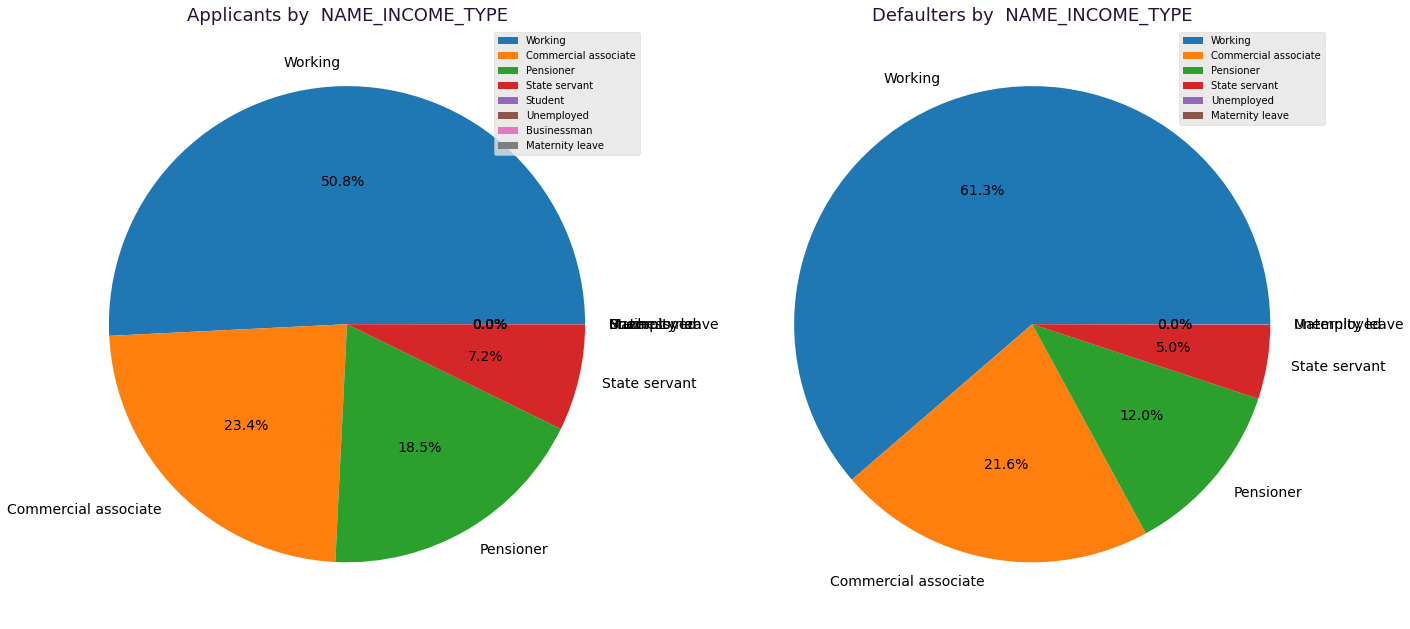

In [53]:
# Comparison of Income Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_INCOME_TYPE')

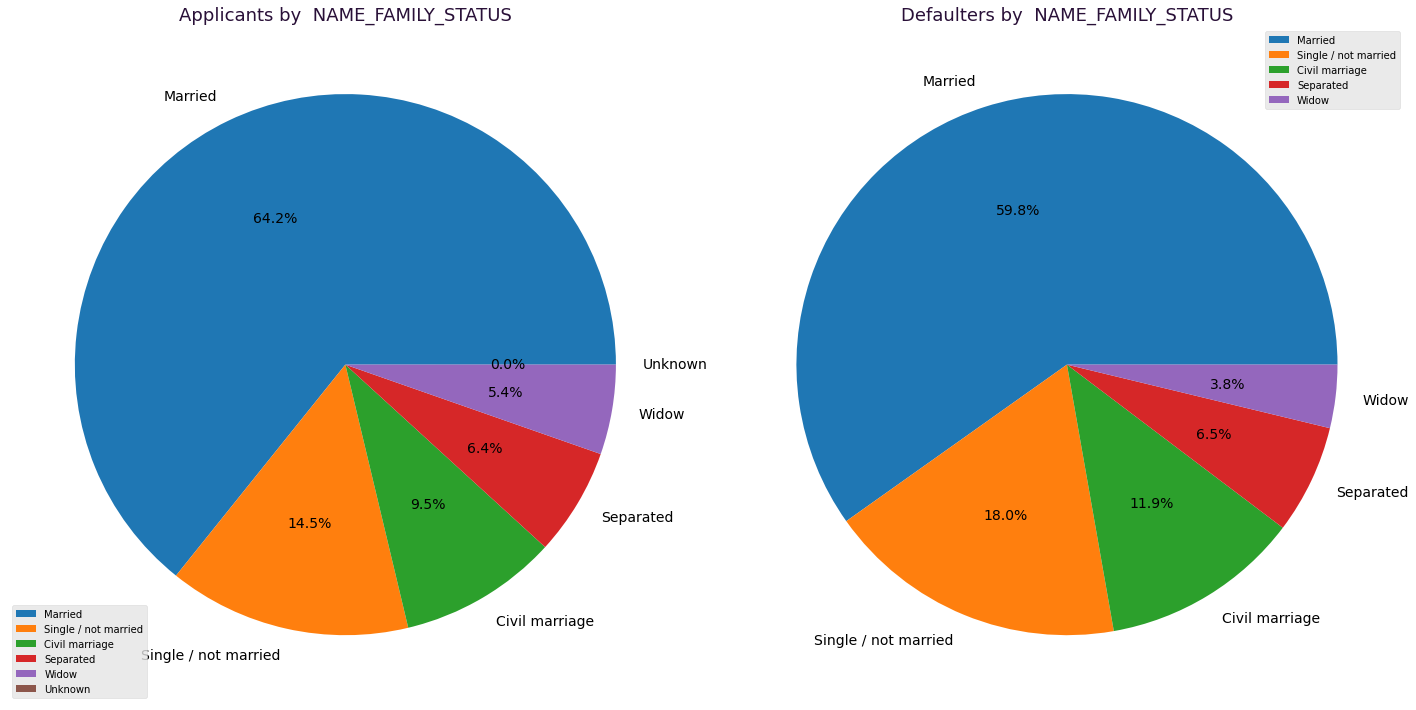

In [54]:
# Comparison of Family Status Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_FAMILY_STATUS')

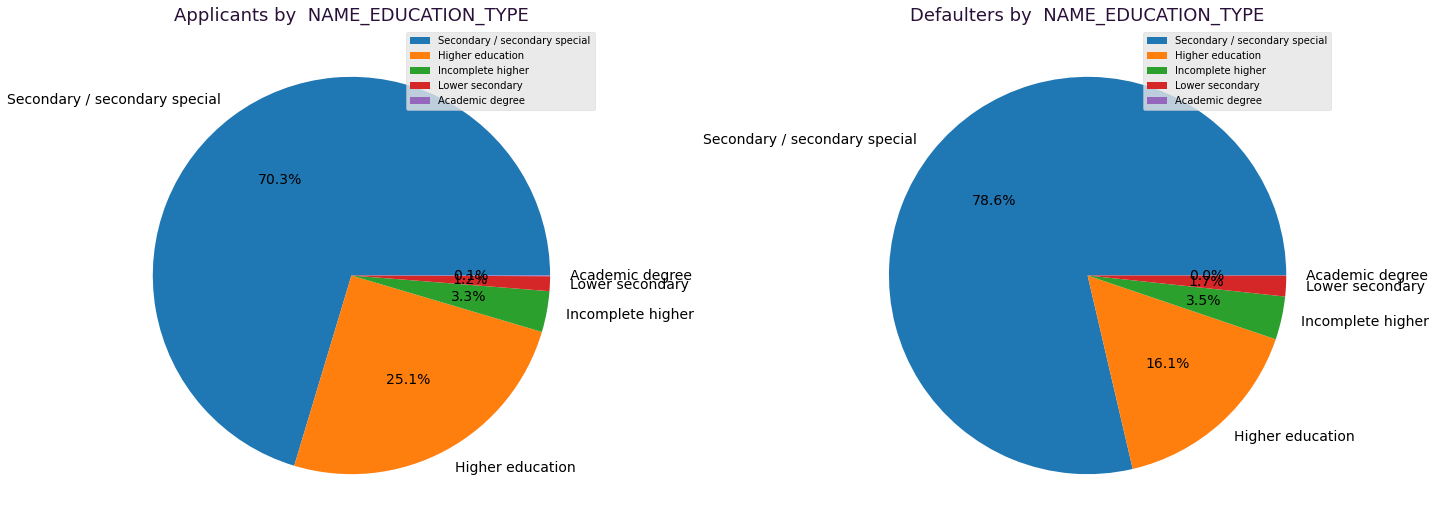

In [55]:
# Comparison of Education Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_EDUCATION_TYPE')

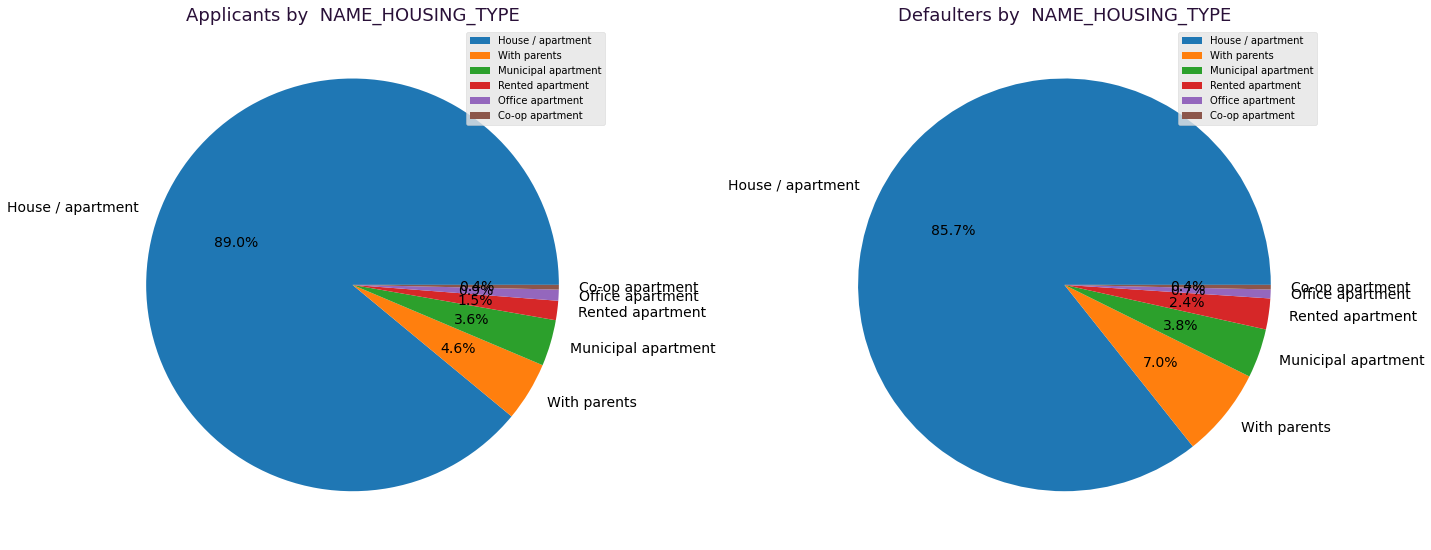

In [56]:
# Comparison of Housig Type Distribution among Defaulters and Non Defaulters


univariate_comparison('NAME_HOUSING_TYPE')

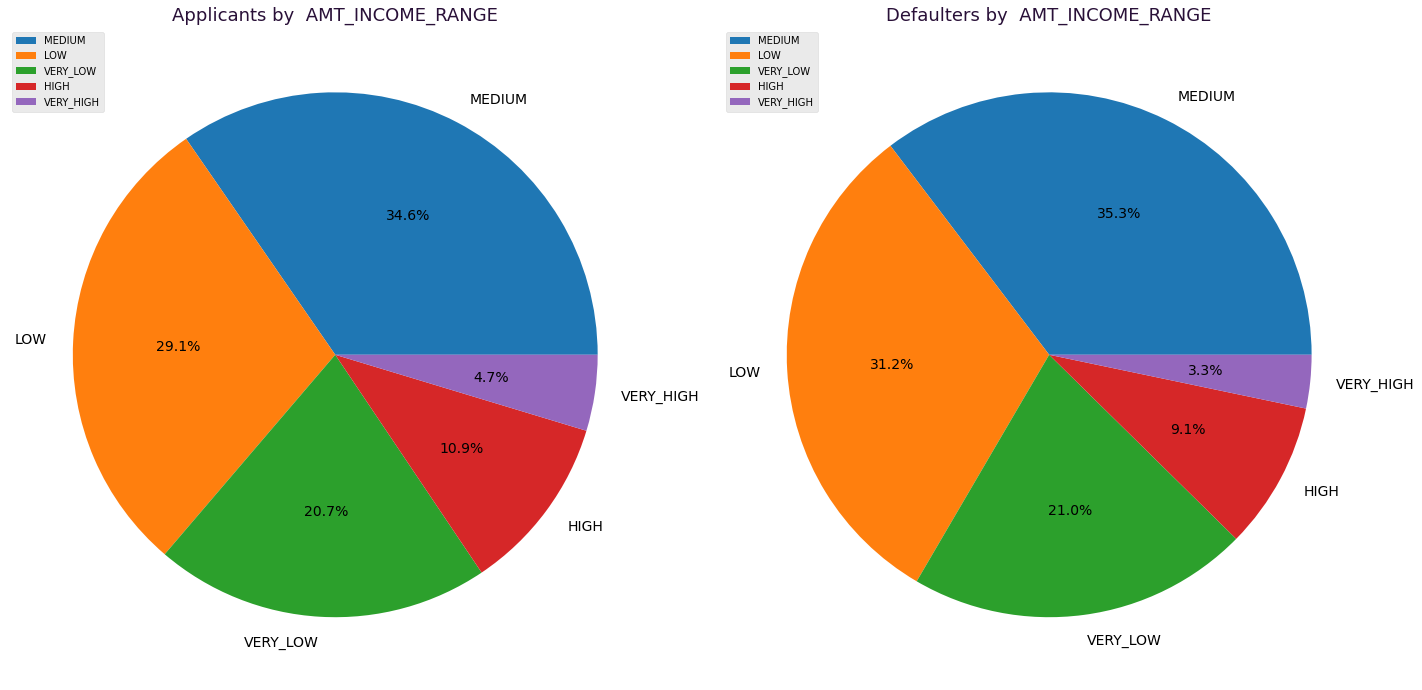

In [57]:
# Comparison of Income Range Distribution among Defaulters and Non Defaulters

univariate_comparison('AMT_INCOME_RANGE')

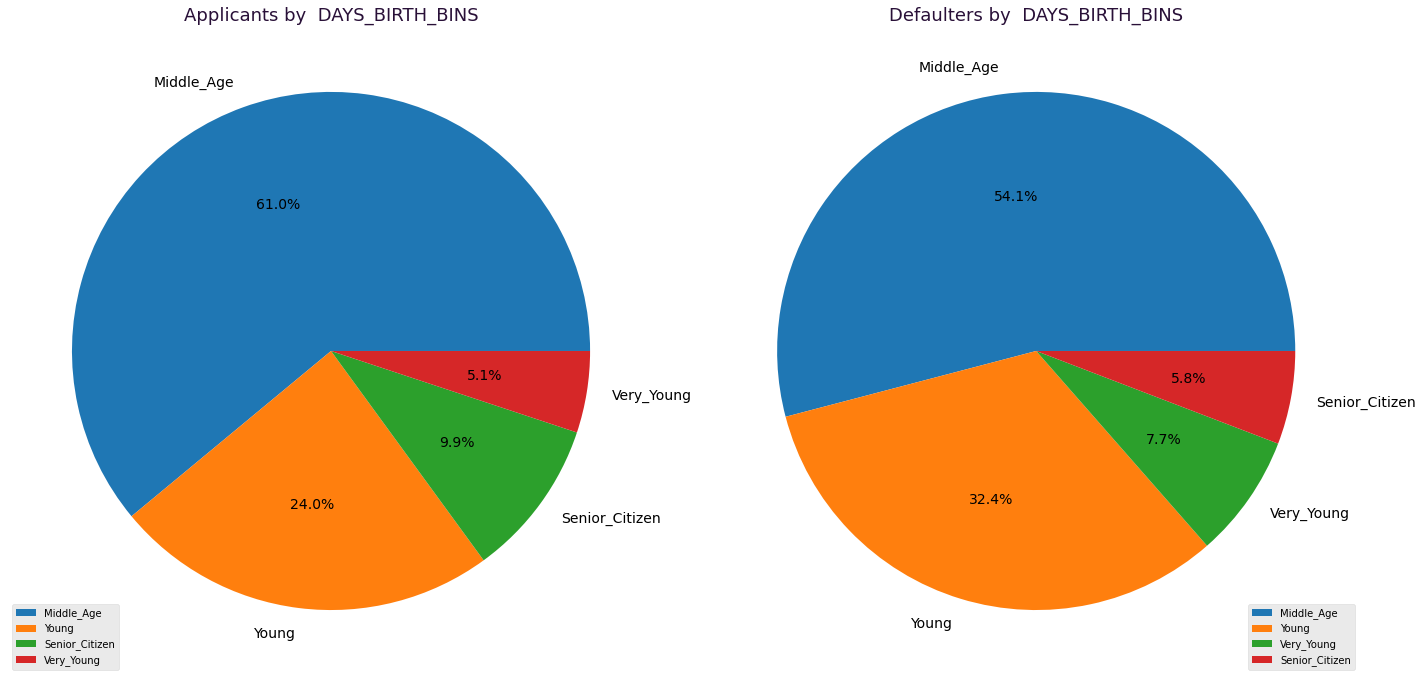

In [58]:
# Comparison of Age Distribution among Defaulters and Non Defaulters

univariate_comparison('DAYS_BIRTH_BINS')

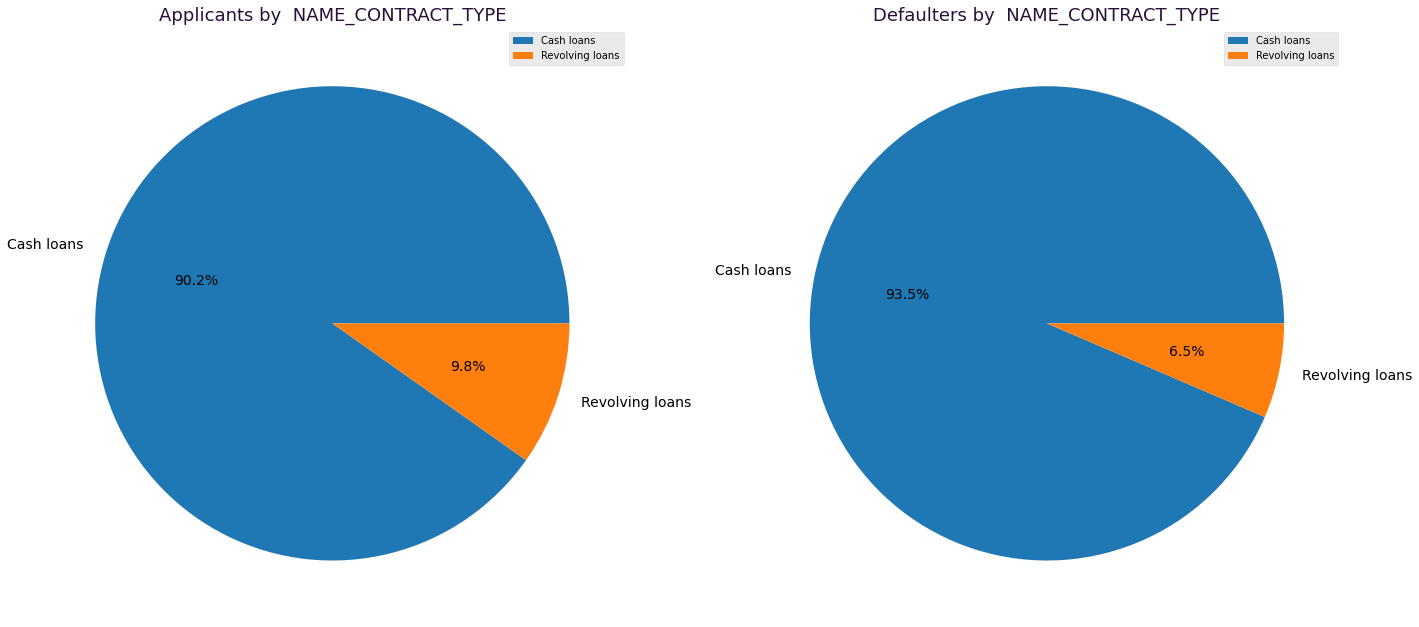

In [59]:
# Comparison of Loan Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_CONTRACT_TYPE')

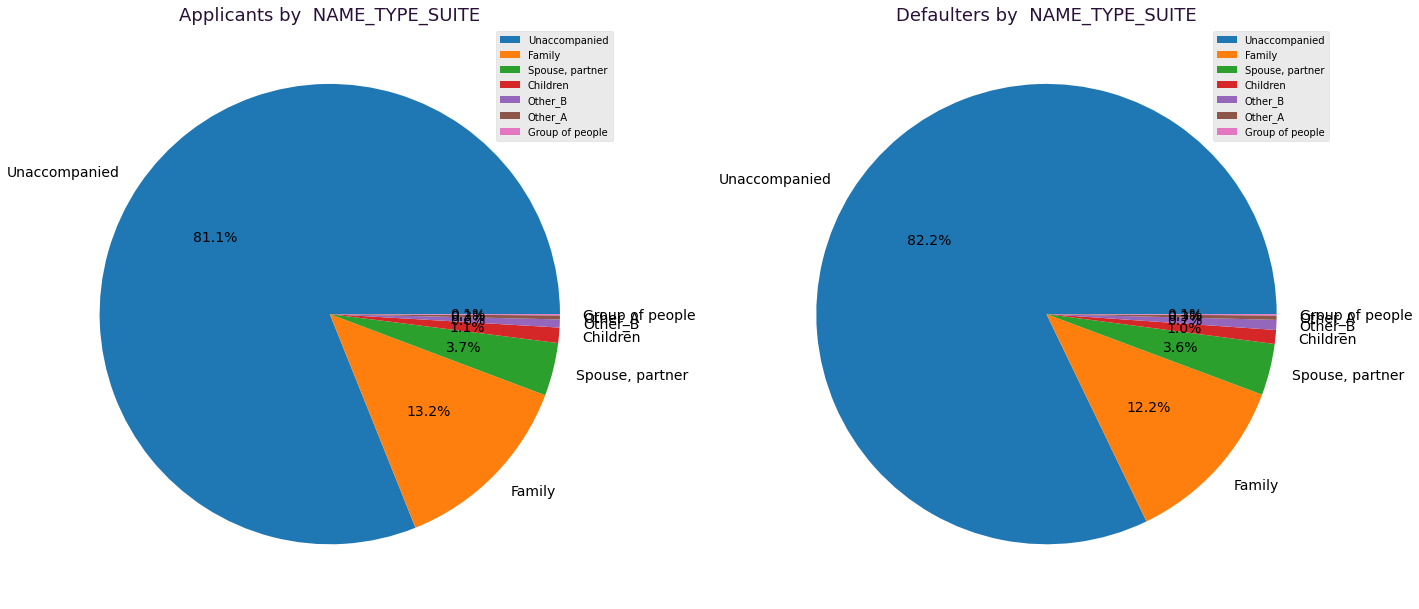

In [60]:
# Comparison of Accompany Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_TYPE_SUITE')

In [61]:
# Defining function for Univariate Analysis of Quantitative Variables

def univariate_comparison_quant(col,hue=None):

    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size
    axes[0,0].set_title("Displot (Non-Defaulter) for  " + col )                   # Chart titl for Subplot 1
    sns.distplot(non_defaulter[~non_defaulter[col].isna()][col],ax=axes[0,0], color="#4CB391") # Distplot in subplot 1


    axes[0,1].set_title("Displot (Defaulter) for  " + col )                       #  Title for Subplot 2
    sns.distplot(defaulter[~defaulter[col].isna()][col],ax=axes[0,1], color="#4CB391") # Displot in Subplot 2
    
    axes[1,0].set_title("Boxplot (Non-Defaulter) for  " + col )                   # Title for Subplot 3
    sns.boxplot(non_defaulter[~non_defaulter[col].isna()][col],ax=axes[1,0], color="#4CB391") # Boxplot in subplot 3

    axes[1,1].set_title("Boxplot (Defaulter) for  " + col )                       # Title for Subplot 4
    sns.boxplot(defaulter[~defaulter[col].isna()][col],ax=axes[1,1], orient='h',color="#4CB391") # Boxplot in Subplot 4

    plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

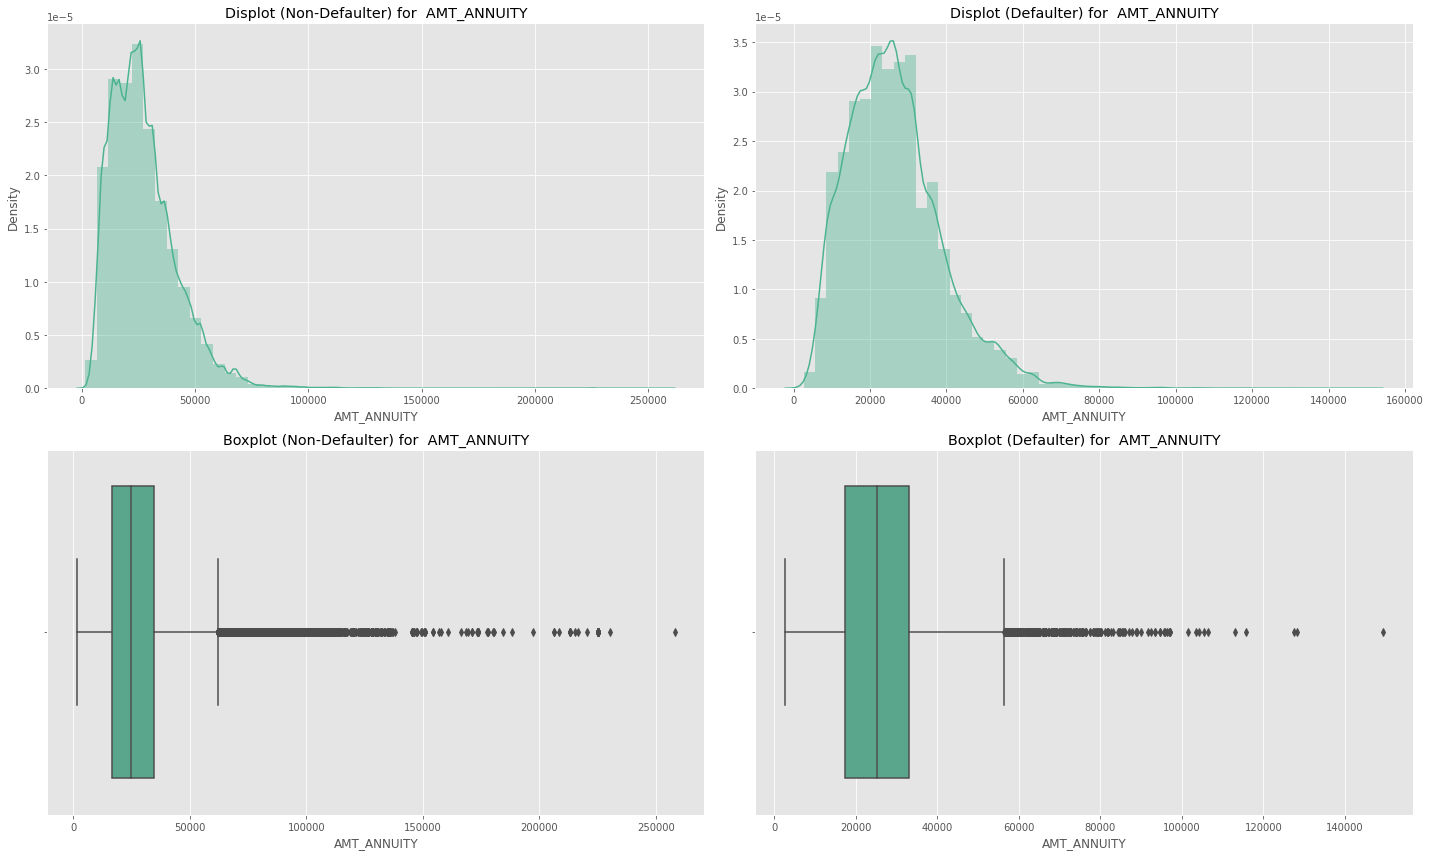

In [62]:
# Univariate Analysis for Annuity Amount

univariate_comparison_quant('AMT_ANNUITY')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

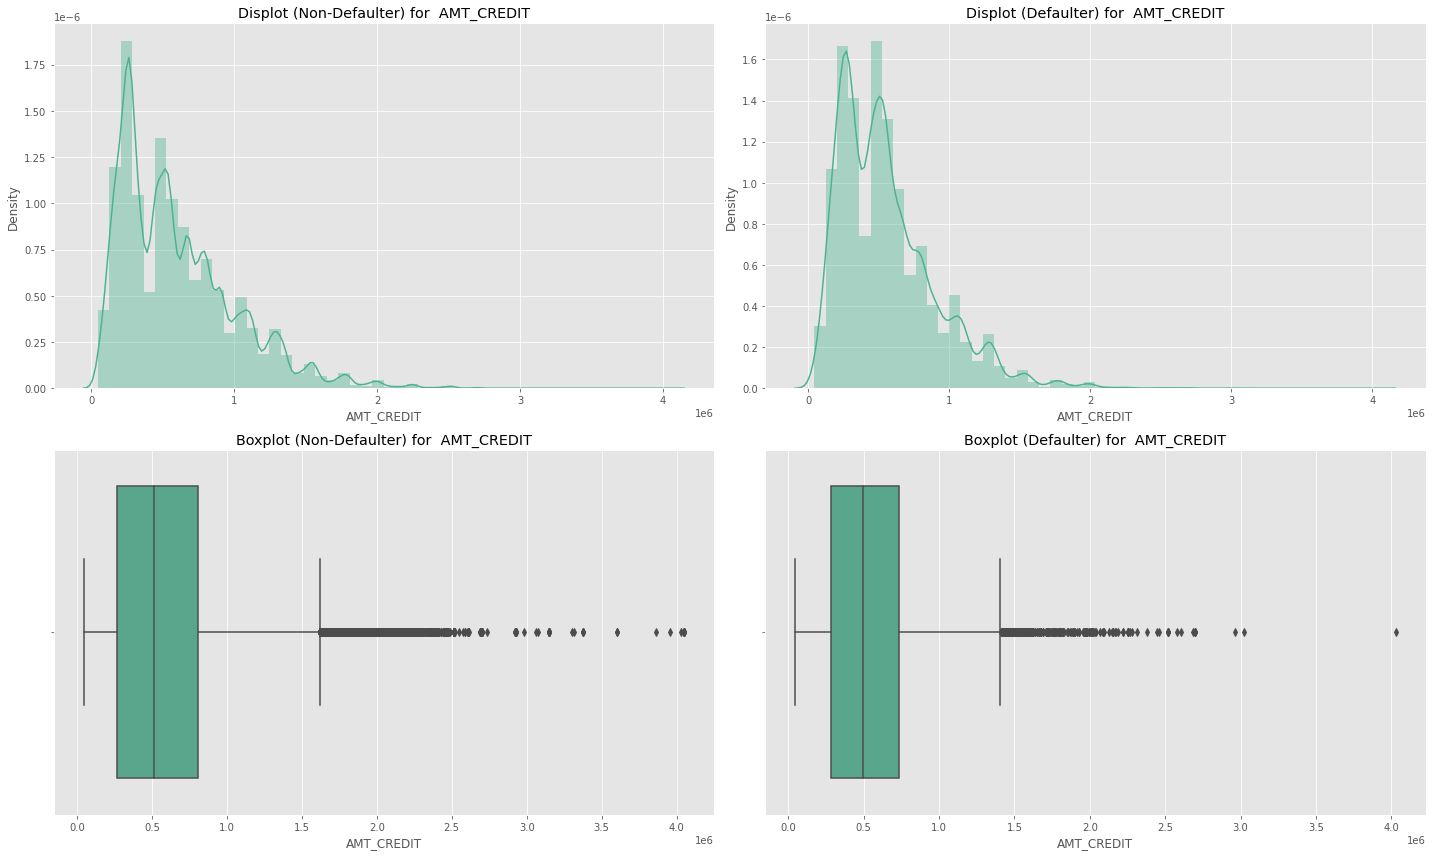

In [63]:
# Univariate Analysis for Loan Amount

univariate_comparison_quant('AMT_CREDIT')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

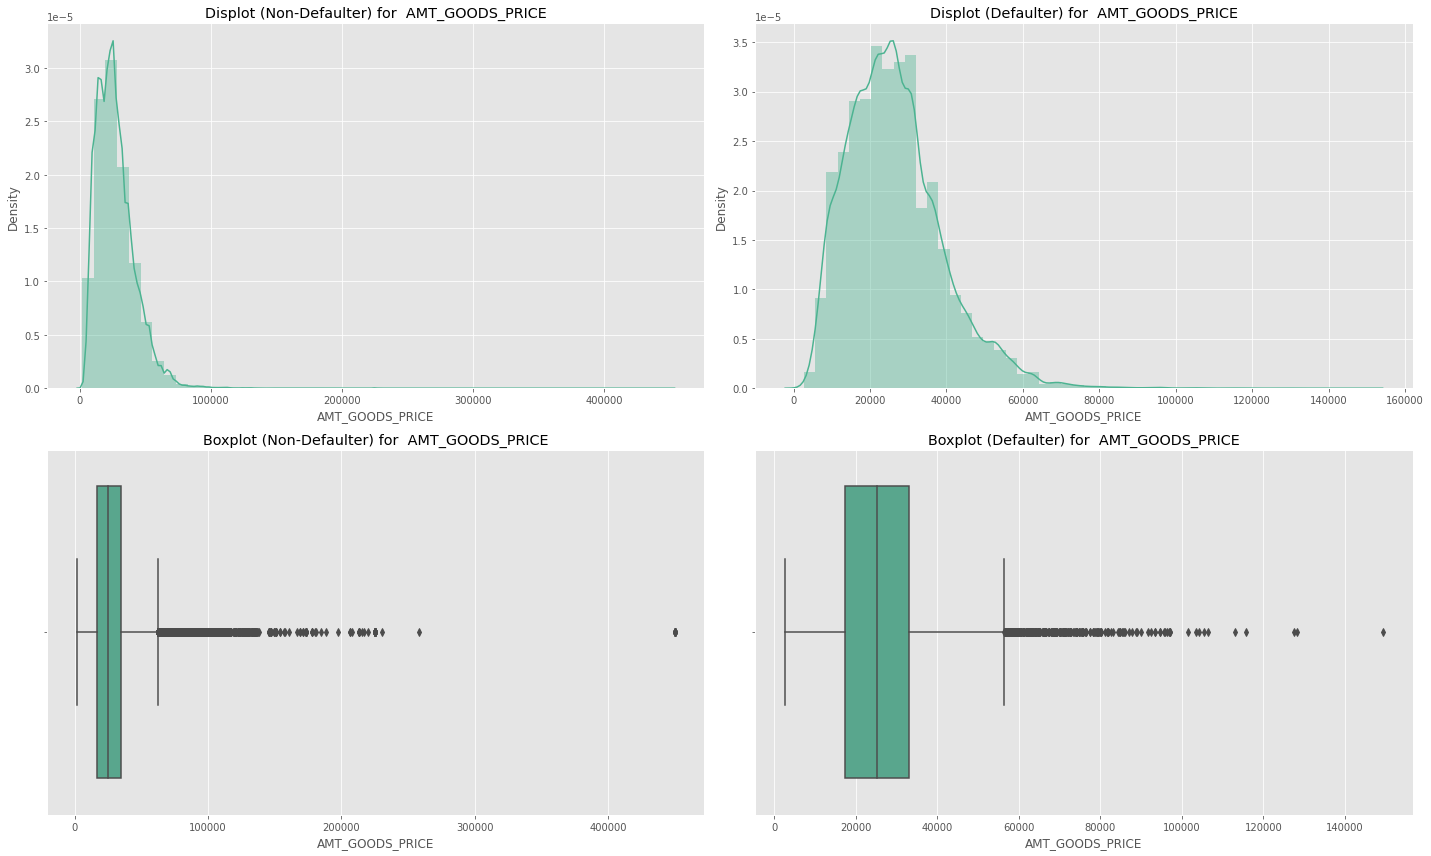

In [64]:
# Univariate Analysis for Goods Price Amount

univariate_comparison_quant(col='AMT_GOODS_PRICE')

In [65]:
# Function for Multivariate analysis

def multivariate(col1,col2,col3):                                            # Takes 3 columns as inputs

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))               
    
    axes[0].set_title("Boxplot (Non-Defaulter) for  "  )
    sns.boxplot(data=non_defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[0])
    axes[0].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Non-Defaulter)', size=15,color = 'blue')

    axes[1].set_title("Boxplot (Defaulter) for  "  )
    sns.boxplot(data=defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[1])
    axes[1].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Defaulter)', size=15,color = 'blue')

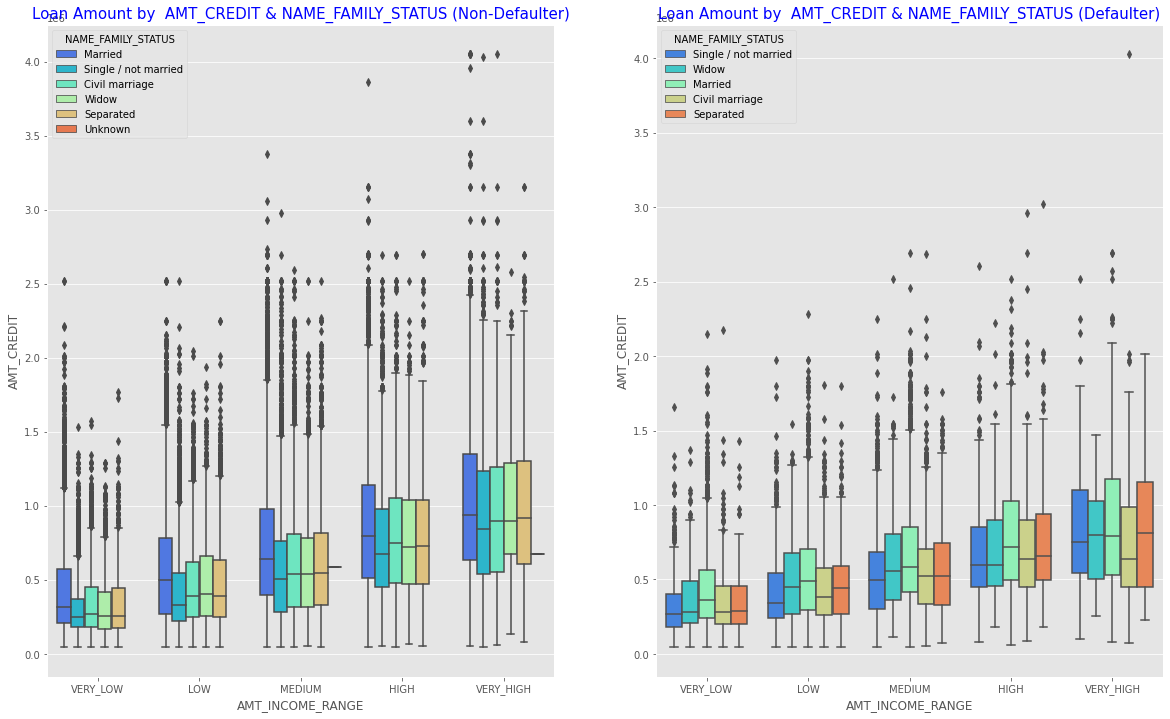

In [66]:
# Analysis of AMT_INCOME_RANGE, AMT_CREDIT & NAME_FAMILY_STATUS
# col 2 is continuous variable, col1,3 are categories
multivariate('AMT_INCOME_RANGE','AMT_CREDIT','NAME_FAMILY_STATUS')

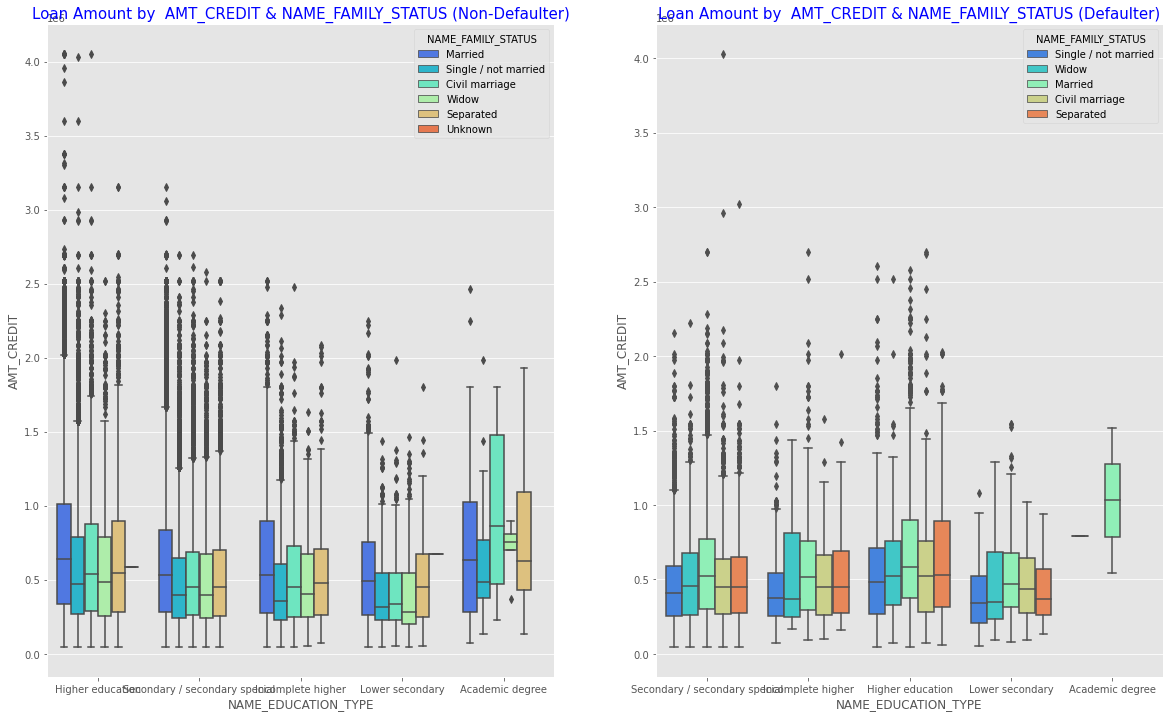

In [67]:
# Analysis of NAME_EDUCATION_TYPE, AMT_CREDIT & NAME_FAMILY_STATUS

multivariate('NAME_EDUCATION_TYPE','AMT_CREDIT','NAME_FAMILY_STATUS')

In [68]:
# Defining function for drilldown analysis

def perc_defaulters(col):

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,10))
    
    total = credit_data_2[[col,'TARGET']].groupby(col).count()
    defaulter_1 = defaulter[[col,'TARGET']].groupby(col).count()
    perc = defaulter_1*100/total
    
    axes[0].set_title("Application Counts by  "+ col  )
    sns.barplot(x=total.index,y=total.TARGET,color='grey',order=total.sort_values('TARGET',ascending=False).index,ax=axes[0])
    axes[0].set_xticklabels(total.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')

    axes[1].set_title("Defaulter % by " + col  )
    sns.barplot(x=perc.index,y=perc.TARGET,color='#ff597d',order=perc.sort_values('TARGET',ascending=False).index,ax=axes[1])
    axes[1].set_xticklabels(perc.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')

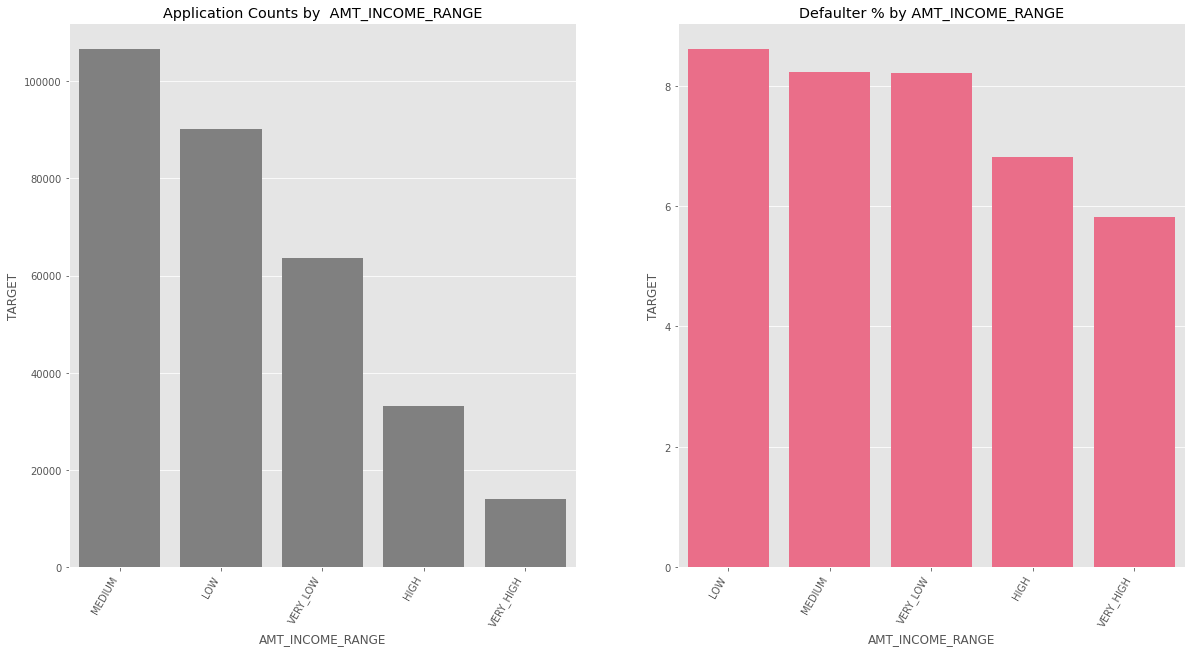

In [69]:
# Drilldown analysis of AMT_INCOME_RANGE

perc_defaulters('AMT_INCOME_RANGE')

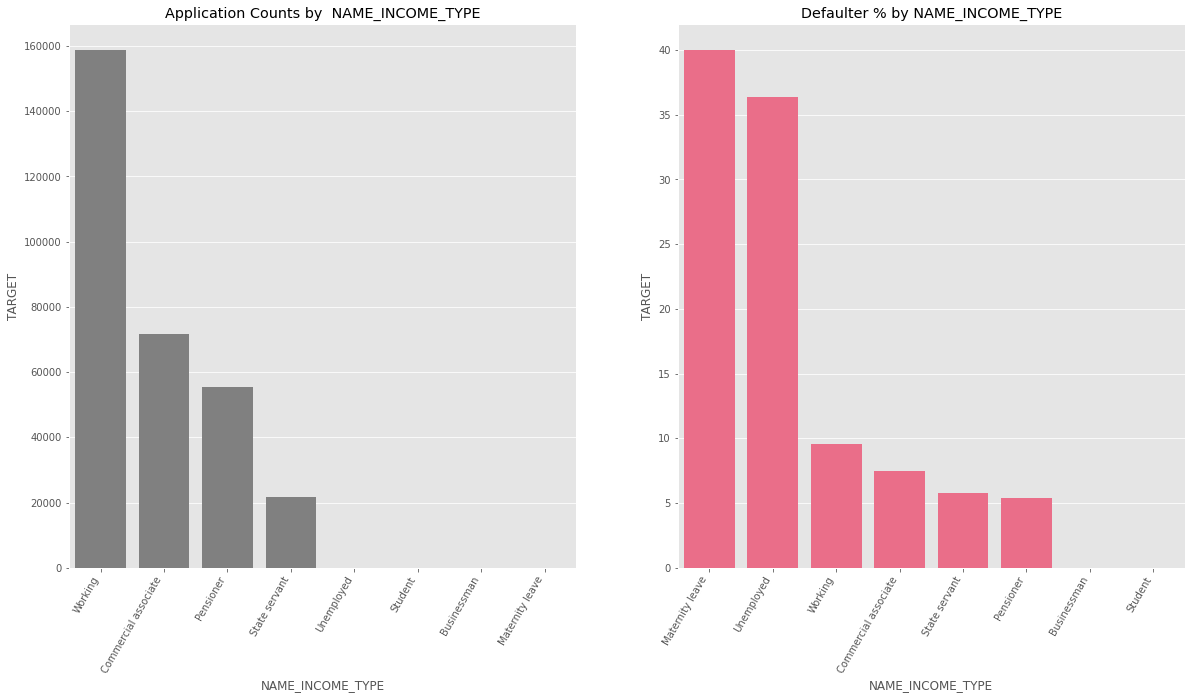

In [70]:
# Drilldown analysis of NAME_INCOME_TYPE

perc_defaulters('NAME_INCOME_TYPE')

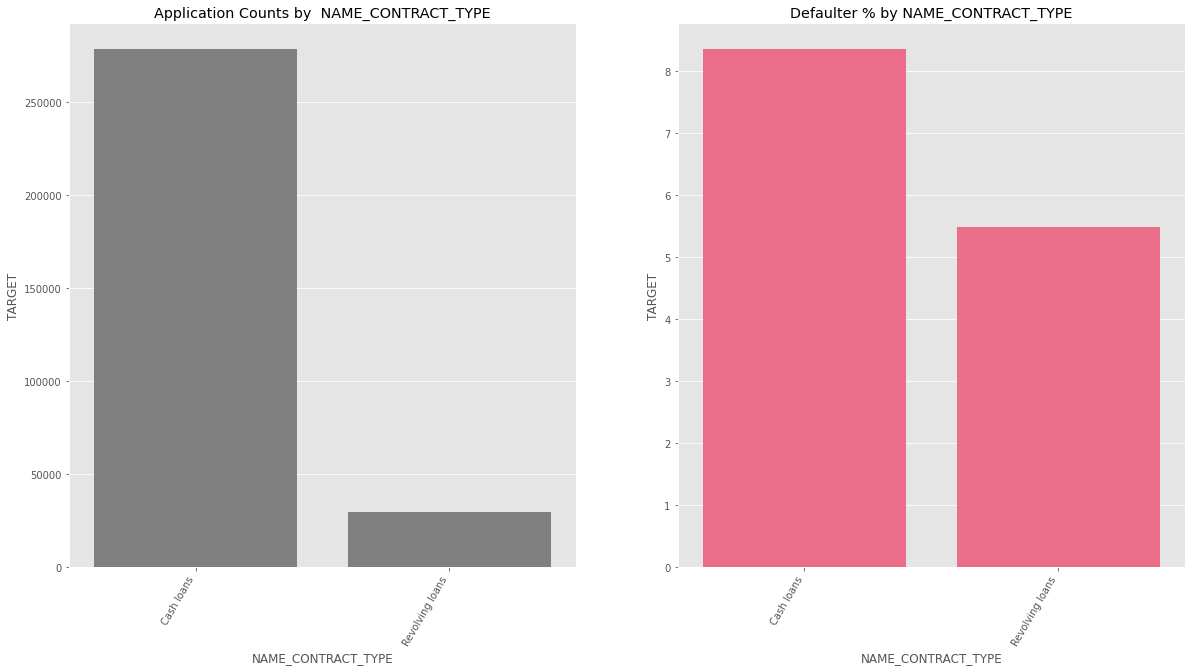

In [71]:
# Drilldown analysis of NAME_CONTRACT_TYPE
perc_defaulters('NAME_CONTRACT_TYPE')

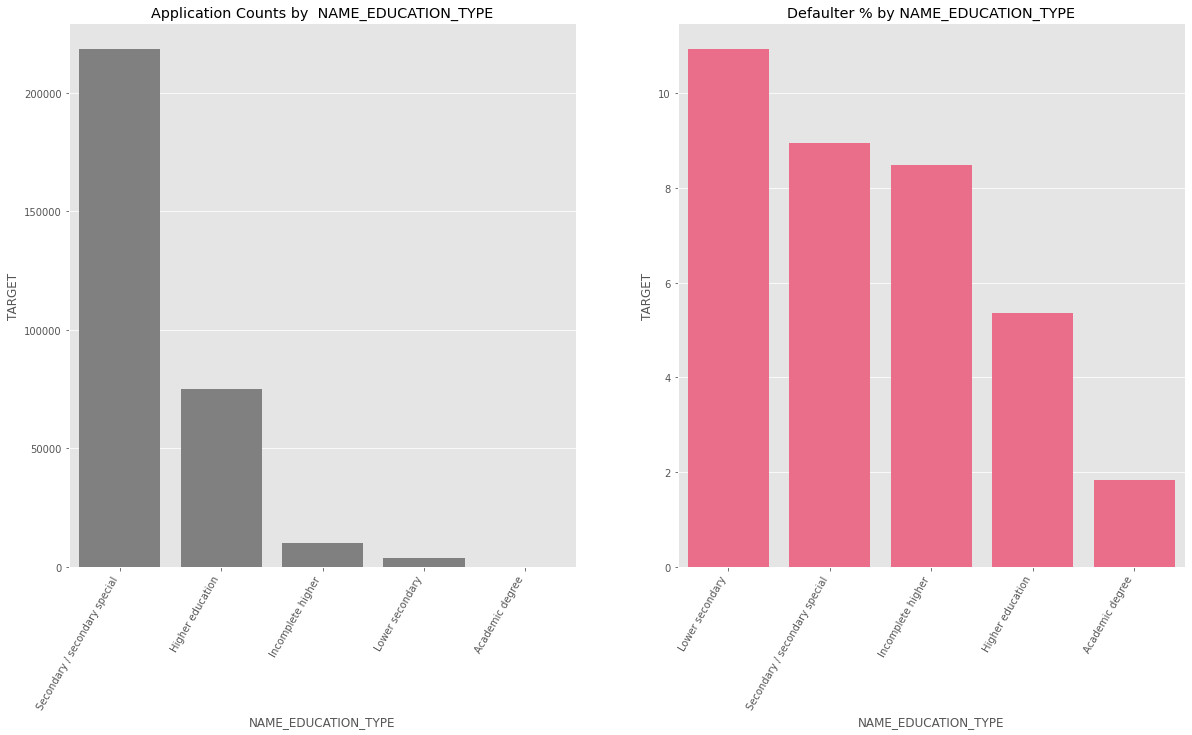

In [72]:
# Drilldown analysis of NAME_EDUCATION_TYPE
perc_defaulters('NAME_EDUCATION_TYPE')

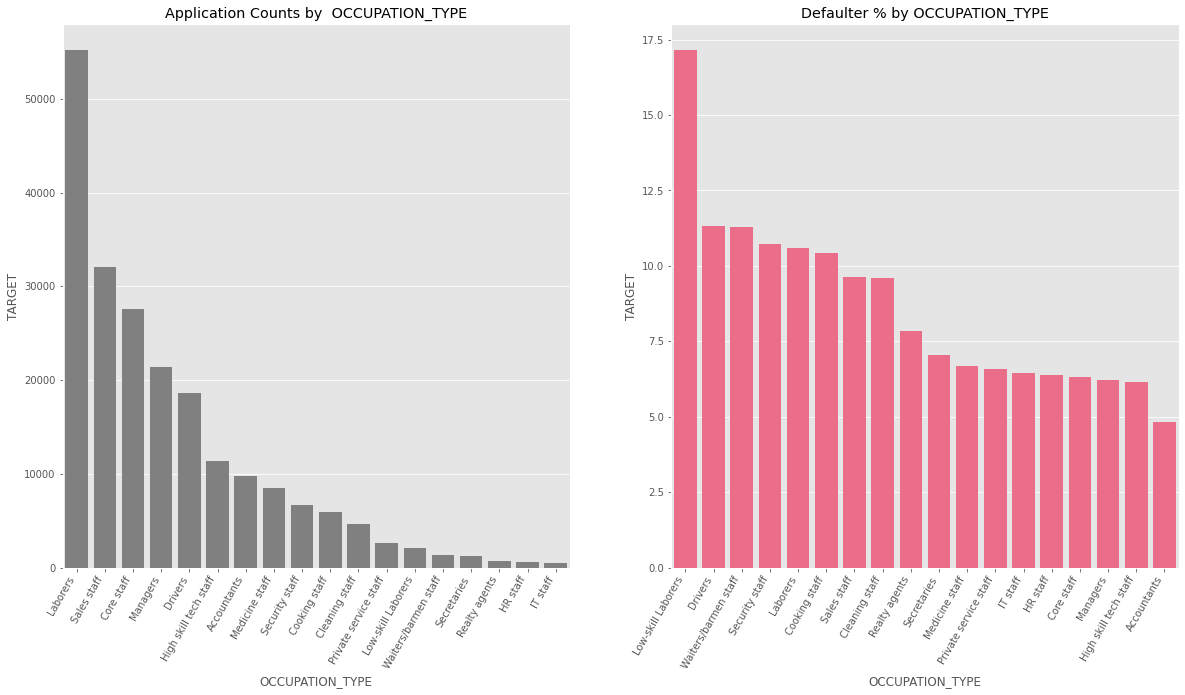

In [73]:
# Drilldown analysis of OCCUPATION_TYPE

perc_defaulters('OCCUPATION_TYPE')


In [74]:
# Pivot table of all loan default %
perc_defaulters= pd.pivot_table(credit_data_2, values='TARGET', 
                      index=['CODE_GENDER','AMT_INCOME_RANGE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
perc_defaulters*100


NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                 0.000000          5.606793   
            LOW                      0.000000          4.902183   
            MEDIUM                   0.000000          5.025389   
            HIGH                    10.526316          4.151552   
            VERY_HIGH                7.692308          3.728906   
M           VERY_LOW                 0.000000          8.041061   
            LOW                      0.000000          7.330468   
            MEDIUM                   0.000000          7.008598   
            HIGH                     0.000000          5.591114   
            VERY_HIGH                0.000000          4.407996   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                   8.639863         8.019324   
            LOW                        8.007537        11.388889   
            MEDIUM                     7.843137         9.698276   
            HIGH                       7.431341         3.896104   
            VERY_HIGH                  8.225108         6.666667   
M           VERY_LOW                  12.396694        12.500000   
            LOW                        9.777778        14.285714   
            MEDIUM                     9.513024        15.051546   
            HIGH                       7.462687         8.163265   
            VERY_HIGH                  7.758621         6.451613   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                               7.677801  
            LOW                                    7.952316  
            MEDIUM                                 7.569169  
            HIGH                                   7.073552  
            VERY_HIGH                              6.593002  
M           VERY_LOW                              11.806626  
            LOW                                   12.369265  
            MEDIUM                                11.346642  
            HIGH                                   9.348442  
            VERY_HIGH                              8.993853

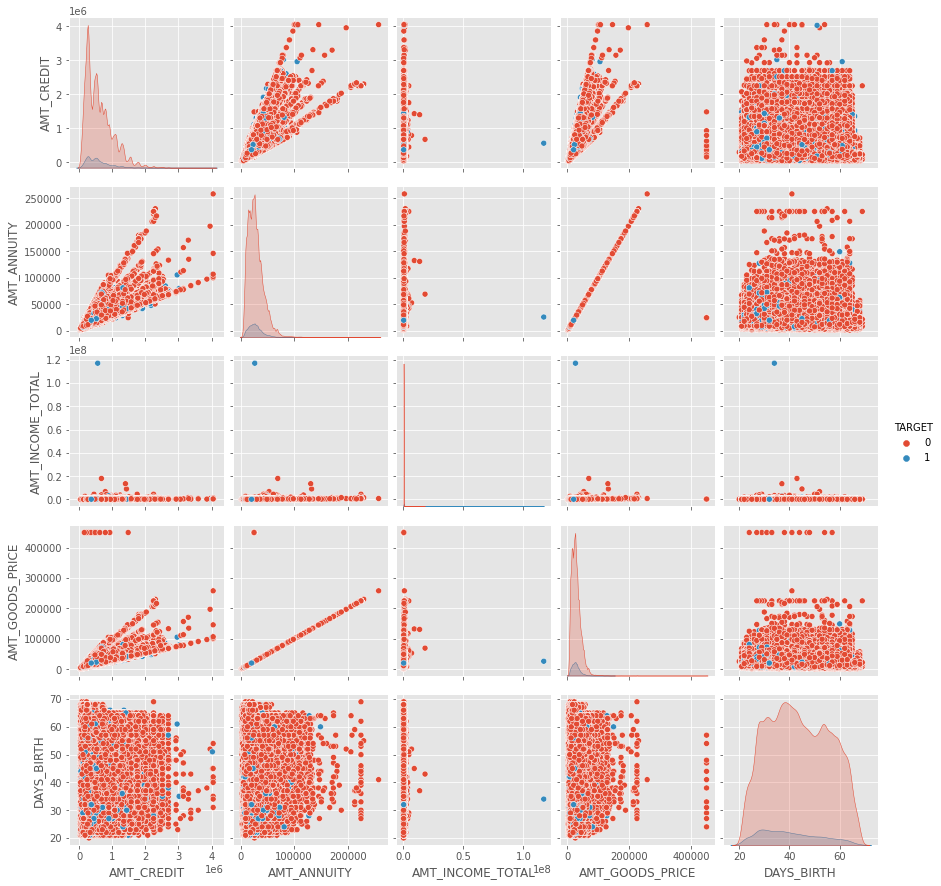

In [75]:
pairplor_data = credit_data_2[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','TARGET']].fillna(0)

# Plotting pairplot
sns.pairplot(pairplor_data,hue='TARGET',diag_kind='kde')

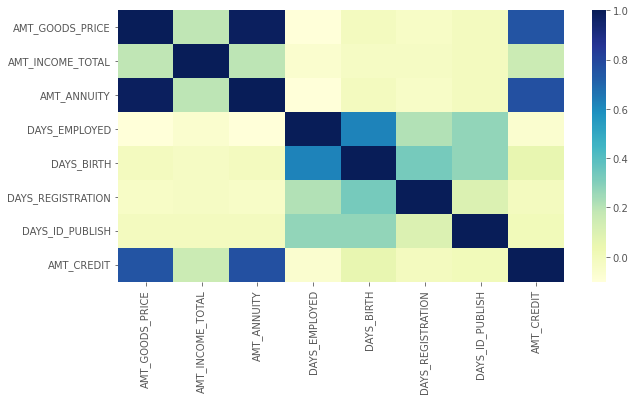

In [76]:
# Data prep for heatmap
heatmap_data = credit_data_2[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method = 'pearson')

# Plotting heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu')

In [77]:
# Preparing data for getting top 10 correlation combinations 

corr_matrix=defaulter[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')                     # Getting Correaltion Matrix

In [78]:
# Filtering top half traingle usng np.triu
corr_matrix=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

corr_matrix_df=corr_matrix.unstack().reset_index()            # Unstacking the last dataframe to get combos of 2 variables 
corr_matrix_df

corr_matrix_df.columns = ['Variable 1','Variable 2','Correlation']          # Naming the cols apprpriately
corr_matrix_df.dropna(subset=['Correlation'],inplace=True)   

<ipython-input-78-76c888e22156>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [79]:
# Adding absolute column as we are interested in magnitude
corr_matrix_df['Correlation ( Absolute )']=corr_matrix_df['Correlation'].abs() 

In [80]:
# Sorting by top correlations and getting top 10 combos
corr_matrix_df.sort_values('Correlation ( Absolute )', ascending=False).head(10)

,Variable 1,Variable 2,Correlation,Correlation ( Absolute )
16,AMT_ANNUITY,AMT_GOODS_PRICE,1.000000,1.000000
58,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
56,AMT_CREDIT,AMT_GOODS_PRICE,0.752195,0.752195
35,DAYS_BIRTH,DAYS_EMPLOYED,0.582441,0.582441
44,DAYS_REGISTRATION,DAYS_BIRTH,0.289116,0.289116
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252256,0.252256
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
43,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455
60,AMT_CREDIT,DAYS_BIRTH,0.135070,0.135070
53,DAYS_ID_PUBLISH,DAYS_REGISTRATION,0.096833,0.096833


# 4. Final Insights

Following are the driving factors for a loan default - 

* Lower the highest education of an applicant, higher the chance of loan default. 
This is one of the core driving factor in loan defaults.

* Labourers & Sales staff are major area of concern , with maximum applicants and a significant loan default rate. Drivers also have an alarming combination of counts and default %.

* Applicants on Maternity leave have a whopping 40% loan default rate. Unemployed applicants also have 35% loan defaults

* Low Income range have maximum % of loan defaults. As the Income range increases, loan default probability decreases

* Among different family status, married ones have the highest likelihood of loan default

* Applicants with lower Annuity Amount are slightly more likely to default on a loan.

* Young applicants are more expected to default on a loan.

* More Men default loans as compared to Women